In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Conv2DTranspose
from tensorflow.keras import Model

plt.figure(figsize=(20, 4))

2023-03-25 19:33:18.008278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

Load dataset and create noisy images

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def normalize(array):
    return array/255

train_data = normalize(x_train)
test_data = normalize(x_test)
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)
print(train_data.shape)
print(noisy_train_data.shape)
print(test_data.shape)
print(noisy_test_data.shape)



(60000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Plot some random images from ground true array nad noisy array

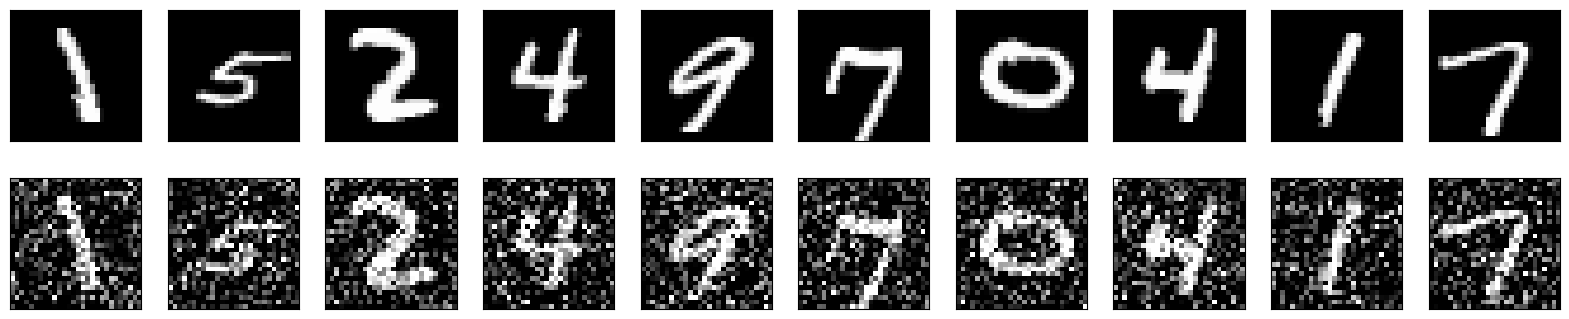

In [34]:
def display(images1, images2):
    n = 10
    indices = np.random.randint(len(images1), size=n)
    images1 = images1[indices, :]
    images2 = images2[indices, :]

    plt.figure(figsize=(20, 4))

    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
display(train_data, noisy_train_data)

Create a CNN 

In [29]:
input = Input(shape=(28,28,1))

#encoder
net = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
net = MaxPooling2D((2, 2), padding="same")(net)
net = Conv2D(32, (3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D((2, 2), padding="same")(net)

#decoder
net = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(net)
net = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(net)
net = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(net)

autoencoder = Model(input, net)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 32)       9248

In [42]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/10
938/938 [==============================] - 80s 86ms/step - loss: 0.0868 - val_loss: 0.0861
Epoch 2/10
331/938 [=========>....................] - ETA: 34s - loss: 0.0868

KeyboardInterrupt: 

In [38]:
predictions = autoencoder.predict(noisy_test_data)


313/313 [==============================] - 6s 19ms/step


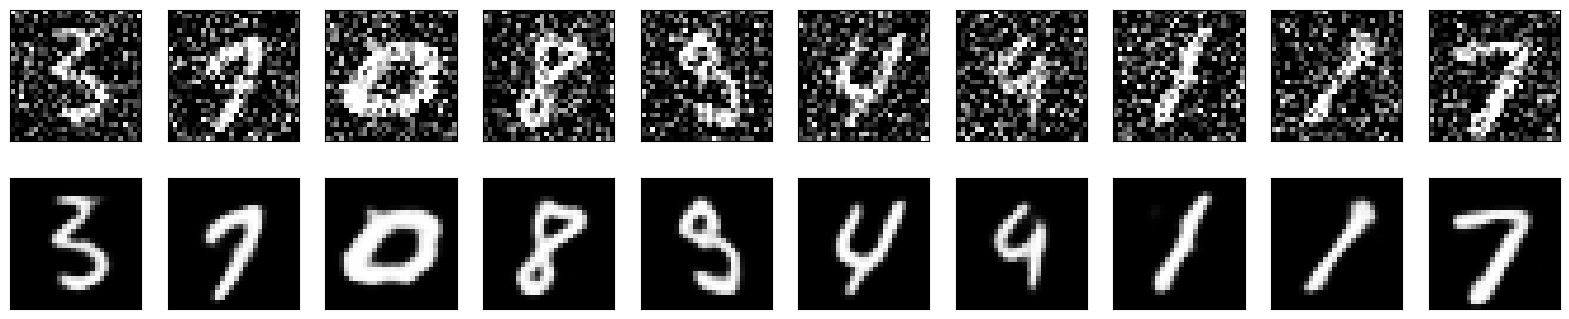

In [35]:
display(noisy_test_data, predictions)

In [37]:
#autoencoder.save('simple_model')

INFO:tensorflow:Assets written to: simple_model/assets


INFO:tensorflow:Assets written to: simple_model/assets


load Fashion MNIST dataset to see what results I get

313/313 [==============================] - 6s 19ms/step


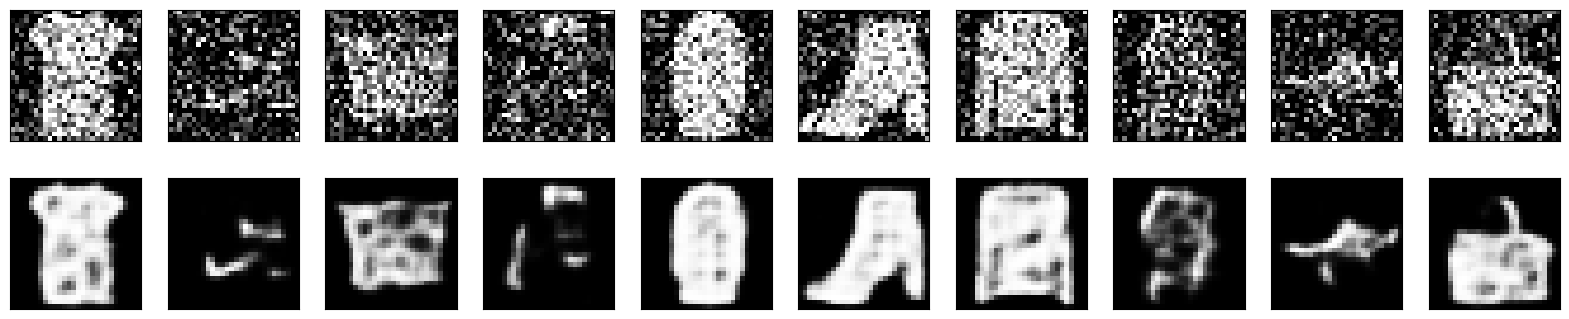

In [41]:
(x_train, y_train), (fashion_x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
fashion_test_data = normalize(fashion_x_test)
noisy_fashion_train_data = noise(fashion_test_data)
fashion_predictions = autoencoder.predict(noisy_fashion_train_data)
display(noisy_fashion_train_data, fashion_predictions)

In [ ]:
display(noisy_test_data, predictions)